# Определение стоимости автомобилей

В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. 

**Задача** -построить модель для предсказания рыночной стоимости автомобиля. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Описание данных**

*Признаки:*
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

*Целевой признак:*
- Price — цена (евро)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, make_scorer

from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [2]:
df = pd.read_csv('/datasets/autos.csv')

In [3]:
display(df.head(15))
print(df.info())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB
None


В данных присутствуют следующие столбцы:

Признаки:
 - DateCrawled — дата скачивания анкеты из базы
 - VehicleType — тип автомобильного кузова
 - RegistrationYear — год регистрации автомобиля
 - Gearbox — тип коробки передач
 - Power — мощность (л. с.)
 - Model — модель автомобиля
 - Kilometer — пробег (км)
 - RegistrationMonth — месяц регистрации автомобиля
 - FuelType — тип топлива
 - Brand — марка автомобиля
 - NotRepaired — была машина в ремонте или нет
 - DateCreated — дата создания анкеты
 - NumberOfPictures — количество фотографий автомобиля
 - PostalCode — почтовый индекс владельца анкеты (пользователя)
 - LastSeen — дата последней активности пользователя

Целевой признак:
 - Price — цена (евро)

Данные с датами не имеют пропусков. Преобразуем типы данных с датами в datetime

In [4]:
df_copy = df.copy()

In [5]:
date_columns = ['DateCrawled', 'DateCreated', 'LastSeen']
for col in date_columns:
    df_copy[col] = pd.to_datetime(df_copy[col], errors='raise', format = '%Y-%m-%d %H:%M:%S')

In [6]:
for col in date_columns:
    print(col, 'Минимальная дата:', df_copy[col].min(), 'Максимальная дата:', df_copy[col].max())

DateCrawled Минимальная дата: 2016-03-05 14:06:22 Максимальная дата: 2016-04-07 14:36:58
DateCreated Минимальная дата: 2014-03-10 00:00:00 Максимальная дата: 2016-04-07 00:00:00
LastSeen Минимальная дата: 2016-03-05 14:15:08 Максимальная дата: 2016-04-07 14:58:51


Можно заметить, что дата скачивания объявления имеет небольшой разброс и данная информация ни как не влияет на стоимость автомобиля. Данный столбец можно удалить. 

Столбец с активностью пользователей так же можно удалить, потому что эти данные не имеют отношения к стоимости авто. Предварительно можно отметить, что каждый пользователь проявлял активность втечение последнего месяца.

Дата создания объявления может отражаться на стоимости авто, т.к. рынок меняется, цены меняются. Создадим отдельный столбец с годом публикации объявления. А столбец с полной датой публикации объявления удалим.

Сервис продает только подержанные автомобили, поэтому важен только год их выпуска. Месяц регистрации авто можно удалить.

Почтовый индекс владельца тоже удалим, он не влияет на стоимость авто.

Количество фотографий может влиять на успех продажи, но на стоимость авто - нет. Этот столбец тоже удалим.

In [7]:
df_copy['YearCreated'] = df_copy['DateCreated'].dt.year
df_copy.drop(['LastSeen', 'DateCrawled', 'RegistrationMonth', 'DateCreated', 'PostalCode', 'NumberOfPictures'], axis=1, inplace=True)
display(df_copy.head())

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,YearCreated
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,2016
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,2016
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,2016
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,2016


Проанализируем столбец целевого признака.

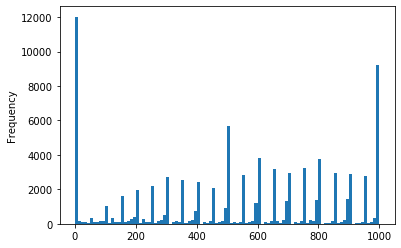

In [8]:
df_copy[df_copy['Price'] <= 1000]['Price'].plot(kind='hist', bins=100)
plt.show()

Достаотчно много машин имеют либо нулевую стоимость, либо близкую к нулю. Даже самый дешевый автомобиль вряд ли может стоить меньше чем 300 евро, если он еще способен ездить. Удалим все авто, стоимость которых меньше 300 евро.

In [9]:
df_copy = df_copy.query('Price >= 300')

In [10]:
print(df_copy.groupby('FuelType')['Price'].count())
print('')
print(df_copy.groupby('Gearbox')['Price'].count())
print('')
print(df_copy['VehicleType'].unique())
print('')
print(df_copy['Model'].unique())

FuelType
cng            543
electric        84
gasoline     96664
hybrid         225
lpg           5117
other          139
petrol      202545
Name: Price, dtype: int64

Gearbox
auto       64198
manual    252247
Name: Price, dtype: int64

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']

['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva'
 'arosa' 'other' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'one' 'fortwo' '1er' 'b_klasse' 'signum' 'astra' 'a8'
 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' 'escort' 'forester'
 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo' 'focus' 'tt' 'corsa'
 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'z_reihe' 'sportage' 'sorento'
 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3' 'almera' 'megane'
 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt' 'impreza'
 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 

В столбцах "тип транспортного средства" и  "марка автомобиля" создадим отдельное значение признака no, означающее, что данный признак не указан.

В столбце "тип транспортного средства" заполним пропуски значением "no", означающим, что тип транспортного средства не указан. Аналогично поступим с авто, у которых не указана модель.

Заменим значения "other" на no, т.к. по факту это пропущенные значения.

In [11]:
df_copy['VehicleType'].fillna('no', inplace=True)
df_copy['Model'].fillna('no', inplace=True)
df_copy['Model'].replace(to_replace='other', value='no', inplace=True)
df_copy['VehicleType'].replace(to_replace='other', value='no', inplace=True)
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331206 entries, 0 to 354368
Data columns (total 11 columns):
Price               331206 non-null int64
VehicleType         331206 non-null object
RegistrationYear    331206 non-null int64
Gearbox             316445 non-null object
Power               331206 non-null int64
Model               331206 non-null object
Kilometer           331206 non-null int64
FuelType            305317 non-null object
Brand               331206 non-null object
NotRepaired         271217 non-null object
YearCreated         331206 non-null int64
dtypes: int64(5), object(6)
memory usage: 30.3+ MB
None


In [12]:
print(df_copy.groupby('NotRepaired')['Price'].count())

NotRepaired
no     241120
yes     30097
Name: Price, dtype: int64


Большинство машин в столбце NotRepaired имеют значение no, т.е. они были в ремонте. Заменим пропуски в данном столбце самыми часто встречающимися значениями, т.е. no.
Далее преобразуем данный категориальный столбец в числовой. Заменим все no на 0, а все yes на 1.

In [13]:
df_copy['NotRepaired'].fillna('no', inplace=True)
df_copy['NotRepaired'].replace(to_replace='no', value=0, inplace=True)
df_copy['NotRepaired'].replace(to_replace='yes', value=1, inplace=True)
print(df_copy.groupby('NotRepaired')['Price'].count())
display(df_copy.head())
print(df_copy.info())

NotRepaired
0    301109
1     30097
Name: Price, dtype: int64


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,YearCreated
0,480,no,1993,manual,0,golf,150000,petrol,volkswagen,0,2016
1,18300,coupe,2011,manual,190,no,125000,gasoline,audi,1,2016
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,0,2016
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,0,2016
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,0,2016


<class 'pandas.core.frame.DataFrame'>
Int64Index: 331206 entries, 0 to 354368
Data columns (total 11 columns):
Price               331206 non-null int64
VehicleType         331206 non-null object
RegistrationYear    331206 non-null int64
Gearbox             316445 non-null object
Power               331206 non-null int64
Model               331206 non-null object
Kilometer           331206 non-null int64
FuelType            305317 non-null object
Brand               331206 non-null object
NotRepaired         331206 non-null int64
YearCreated         331206 non-null int64
dtypes: int64(6), object(5)
memory usage: 30.3+ MB
None


Пропуски в столбцах "коробка передач" и "тип топлива" заменим самым часто встречающимся значением для каждой модели автомобиля.

Коробки передач преобразуем в численный признак. Механическая будет 0, автоматическая - 1

In [14]:
df_copy['FuelType'].fillna('no', inplace=True)
df_copy['FuelType'].replace(to_replace='other', value='no', inplace=True)
fuel = df_copy.pivot_table(index='Model', columns='FuelType', aggfunc='count')['Price']
fuel = fuel.fillna(0)
def fu(row):
    if max(row['cng'], row['electric'], row['gasoline'], row['hybrid'], row['lpg'], row['petrol'], row['no']) == row['cng']: return 'cng'
    elif max(row['cng'], row['electric'], row['gasoline'], row['hybrid'], row['lpg'], row['petrol'], row['no']) == row['electric']: return 'electric'
    elif max(row['cng'], row['electric'], row['gasoline'], row['hybrid'], row['lpg'], row['petrol'], row['no']) == row['hybrid']: return 'hybrid'
    elif max(row['cng'], row['electric'], row['gasoline'], row['hybrid'], row['lpg'], row['petrol'], row['no']) == row['lpg']: return 'lpg'
    elif max(row['cng'], row['electric'], row['gasoline'], row['hybrid'], row['lpg'], row['petrol'], row['no']) == row['petrol']: return 'petrol'
    elif max(row['cng'], row['electric'], row['gasoline'], row['hybrid'], row['lpg'], row['petrol'], row['no']) == row['gasoline']: return 'gasoline'
    elif max(row['cng'], row['electric'], row['gasoline'], row['hybrid'], row['lpg'], row['petrol'], row['no']) == row['no']: return 'not mentioned'
fuel['fuel'] = fuel.apply(fu, axis=1)
fuel = fuel.drop(['cng', 'electric', 'gasoline', 'hybrid', 'lpg', 'petrol', 'no'], axis=1)
print(fuel)

FuelType      fuel
Model             
100         petrol
145         petrol
147         petrol
156         petrol
159       gasoline
...            ...
yaris       petrol
yeti        petrol
ypsilon     petrol
z_reihe     petrol
zafira      petrol

[250 rows x 1 columns]


In [15]:
df_copy['Gearbox'].fillna('no', inplace=True)
gearboxes = df_copy.pivot_table(index='Model', columns='Gearbox', aggfunc='count')['Price']
gearboxes = gearboxes.fillna(0)
def gear(row):
    if row['auto'] >= row['manual']:
        return 1
    else:
        return 0
gearboxes['gearbox'] = gearboxes.apply(gear, axis=1)
gearboxes = gearboxes.drop(['auto', 'manual', 'no'], axis=1)
print(gearboxes)

Gearbox  gearbox
Model           
100            0
145            0
147            0
156            0
159            0
...          ...
yaris          0
yeti           0
ypsilon        0
z_reihe        0
zafira         0

[250 rows x 1 columns]


In [16]:
def filgear(row):
    model = row['Model']
    if row['Gearbox'] == 'no':
        return gearboxes.loc[model, 'gearbox']
    else:
        return row['Gearbox']

df_copy['Gearbox_new'] = df_copy.apply(filgear, axis=1)
df_copy['Gearbox_new'].replace(to_replace='manual', value=0, inplace=True)
df_copy['Gearbox_new'].replace(to_replace='auto', value=1, inplace=True)
df_copy = df_copy.drop('Gearbox', axis=1)
print(df_copy.groupby('Gearbox_new')['Price'].count())

Gearbox_new
0    265500
1     65706
Name: Price, dtype: int64


In [17]:
def filfuel(row):
    model = row['Model']
    if row['FuelType'] == 'no':
        return fuel.loc[model, 'fuel']
    else:
        return row['FuelType']

df_copy['FuelType_new'] = df_copy.apply(filfuel, axis=1)
df_copy = df_copy.drop('FuelType', axis=1)
print(df_copy.groupby('FuelType_new')['Price'].count())

FuelType_new
cng            543
electric        84
gasoline    100975
hybrid         225
lpg           5117
petrol      224262
Name: Price, dtype: int64


In [18]:
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331206 entries, 0 to 354368
Data columns (total 11 columns):
Price               331206 non-null int64
VehicleType         331206 non-null object
RegistrationYear    331206 non-null int64
Power               331206 non-null int64
Model               331206 non-null object
Kilometer           331206 non-null int64
Brand               331206 non-null object
NotRepaired         331206 non-null int64
YearCreated         331206 non-null int64
Gearbox_new         331206 non-null int64
FuelType_new        331206 non-null object
dtypes: int64(7), object(4)
memory usage: 30.3+ MB
None


Пропуски заполнены, лишние данные удалены.

## Обучение моделей

Закодируем категориальные признаки. Затем разобьем данные на выборки. Произведем масштабирование численных признаков. И приступим к обучению моделей.

Для кодирования примним технику OHE.

In [19]:
df_copy_ohe = pd.get_dummies(df_copy, drop_first=True)
display(df_copy_ohe.head())

,Price,RegistrationYear,Power,Kilometer,NotRepaired,YearCreated,Gearbox_new,VehicleType_convertible,VehicleType_coupe,VehicleType_no,...,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,FuelType_new_electric,FuelType_new_gasoline,FuelType_new_hybrid,FuelType_new_lpg,FuelType_new_petrol
0,480,1993,0,150000,0,2016,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,18300,2011,190,125000,1,2016,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,9800,2004,163,125000,0,2016,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1500,2001,75,150000,0,2016,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3600,2008,69,90000,0,2016,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
target = df_copy_ohe['Price']
features = df_copy_ohe.drop('Price', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=123)

In [21]:
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'YearCreated']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [22]:
def rmse(true, predict):
    return mean_squared_error(true, predict) ** 0.5

rmse_scorer = make_scorer(rmse, greater_is_better=False)

Перед обучением моделей выведем среднее значение целевого признака, медиану и стандартное отклонение.

In [23]:
print('Среднее значение цены на автомобиль', target.mean())
print('Медианное значение цены на автомобиль', target.median())
print('Стандартное отклонение цены на автомобиль', target.std())

Среднее значение цены на автомобиль 4719.470097160076
Медианное значение цены на автомобиль 2999.0
Стандартное отклонение цены на автомобиль 4516.543059988167


In [24]:
%%time

model = LGBMRegressor(random_state=123)
params = {'max_depth': np.arange(9, 11, 1), 'n_estimators': np.arange(89,110,10), 'num_leaves': np.arange(24,35,5)}
grid = GridSearchCV(model, params, scoring=rmse_scorer, cv=2)
grid.fit(features_train, target_train)

print('Комбинация параметров, которая дает лучший результат:', grid.best_params_)
print(f'Минимальный RMSE: {abs(grid.best_score_):.0f}')

In [25]:
%%time

model_2 = LinearRegression()
model_2.fit(features_train, target_train)

CPU times: user 22.8 s, sys: 8.33 s, total: 31.1 s
Wall time: 31.2 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
%%time

predictions_2 = model_2.predict(features_valid)
result_2 = rmse(target_valid, predictions_2)
print(result_2)
print('')

3161.392160028946

CPU times: user 101 ms, sys: 109 ms, total: 210 ms
Wall time: 191 ms


In [27]:
%%time

model_1 = CatBoostRegressor(loss_function='RMSE', iterations=300, random_seed=123)
model_1.fit(features_train, target_train, verbose=30)

0:	learn: 4432.9912422	total: 214ms	remaining: 1m 3s
30:	learn: 2926.2800399	total: 5.61s	remaining: 48.7s
60:	learn: 2411.3507403	total: 10.9s	remaining: 42.6s
90:	learn: 2198.3716721	total: 16.2s	remaining: 37.1s
120:	learn: 2093.7801677	total: 21.3s	remaining: 31.6s
150:	learn: 2031.4228266	total: 26.6s	remaining: 26.3s
180:	learn: 1987.7021336	total: 31.7s	remaining: 20.8s
210:	learn: 1953.5945136	total: 36.6s	remaining: 15.5s
240:	learn: 1928.7803016	total: 41.9s	remaining: 10.3s
270:	learn: 1908.1267951	total: 47s	remaining: 5.03s
299:	learn: 1891.8903554	total: 51.8s	remaining: 0us
CPU times: user 51.6 s, sys: 6.16 s, total: 57.8 s
Wall time: 59.4 s


In [28]:
%%time

predictions_1 = model_1.predict(features_valid)
result_1 = rmse(target_valid, predictions_1)
print('')
print(result_1)
print('')


1904.5424114428306

CPU times: user 126 ms, sys: 14.8 ms, total: 141 ms
Wall time: 82.6 ms


In [29]:
%%time

model_3 = LGBMRegressor(max_depth = 40, n_estimators=200, random_state=123)
model_3.fit(features_train, target_train)

CPU times: user 22.9 s, sys: 412 ms, total: 23.4 s
Wall time: 23.7 s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=40,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [30]:
%%time

predictions_3 = model_3.predict(features_valid)
result_3 = rmse(target_valid, predictions_3)
print('')
print(result_3)
print('')


1703.0486306473135

CPU times: user 2.39 s, sys: 121 ms, total: 2.51 s
Wall time: 2.5 s


## Анализ моделей

In [31]:
data = pd.DataFrame({'model': ['LinearRegression', 'CatBoostRegressor', 'LGBMRegressor'], 'fit_time':['31.2 s', '59.4 s', '23.7 s'], 'predict_time': ['191 ms', '82.6 ms', '2.5 s'], 'RMSE': [3161, 1904, 1703]})
display(data)

,model,fit_time,predict_time,RMSE
0,LinearRegression,25.9 s,183 ms,3161
1,CatBoostRegressor,59.4 s,77 ms,1904
2,LGBMRegressor,23.8 s,2.56 s,1703


1) Линейная регрессия обучается достаточно быстро, но выдает плохое качетсво.

2) Градиентный бустинг CatBoost дает значительно лучший результат чем линейная регрессия, но обучается дольше. После 200 итераций качество уже почти не улучшается. Предсказания у CatBoost происходят очень быстро.

3) Бустинг LightGBM выдает наилучший результат за кротчайшее время. Время обучения такое же, как у линейной регрессии и в 2 раза быстрее чем CatBoost, а качество лучше чем у CatBoost. Предсказания же происходят во много раз дольше чем у CatBoost, но в нашем случае это не больше нескольких секунд.

Таким образом, оптимальная модель - LGBMRegressor. Она выдает наилучшее качество, обучается достаточно быстро, суммарное время работы самое быстрое.